In [128]:
# libraries for data manipulation
import numpy as np
import pandas as pd

# libraries for data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# jupyter extension to render charts inline
%matplotlib inline

In [129]:
raw_df = pd.read_csv('NYCHA_Development_Data_Book_snapshot.csv')

In [130]:
print(raw_df.columns)

Index(['DATA AS OF', 'DEVELOPMENT', 'HUD AMP#', 'TDS#', 'CONSOLIDATED TDS#',
       'DEVELOPMENT EDP#', 'OPERATING EDP#', 'HUD #', 'PROGRAM', 'METHOD',
       'TYPE', 'NUMBER OF SECTION 8 TRANSITION APARTMENTS',
       'NUMBER OF CURRENT APARTMENTS', 'TOTAL NUMBER OF APARTMENTS',
       'NUMBER OF RENTAL ROOMS', 'AVG NO R/R PER APARTMENT',
       'POPULATION SECTION 8 TRANSITION', 'POPULATION PUBLIC HOUSING',
       'TOTAL POPULATION', 'TOTAL # OF FIXED INCOME HOUSEHOLD',
       'PERCENT FIXED INCOME HOUSEHOLDS', 'NUMBER OF RESIDENTIAL BLDGS',
       'NUMBER OF NON-RESIDENTIAL BLDGS', 'NUMBER OF STAIRHALLS',
       'NUMBER OF STORIES', 'TOTAL AREA SQ FT', 'ACRES', 'NET DEV AREA SQ FT',
       'EXCLUDING PARK ACRES', 'BLDG COVERAGE SQ FT', 'CUBAGE CU FT',
       'BLDG COVERAGE %', 'DENSITY', 'DEVELOPMENT COST', 'PER RENTAL ROOM',
       'AVG MONTHLY GROSS RENT', 'LOCATION STREET A', 'LOCATION STREET B',
       'LOCATION STREET C', 'LOCATION STREET D', 'BOROUGH',
       'COMMUNITY DISTIR

In [131]:
raw_df.head()


#1.4 #1: The last four columns contain null values which means there is no data present for those colunms
#1.4 #2: The completion dates are not in chronological order
#1.4 #3: Many of the columns are using specific values that are assigned to that case instead of calculating or keeping track of something

,DATA AS OF,DEVELOPMENT,HUD AMP#,TDS#,CONSOLIDATED TDS#,DEVELOPMENT EDP#,OPERATING EDP#,HUD #,PROGRAM,METHOD,...,US CONGRESSIONAL DISTRICT,NY STATE SENATE DISTRICT,NY STATE ASSEMBLY DISTRICT,NY CITY COUNCIL DISTRICT,COMPLETION DATE,FEDERALIZED DEVELOPMENT,SENIOR DEVELOPMENT,ELECTRICITY PAID BY RESIDENTS,PRIVATE MANAGEMENT,RAD TRANSFERRED DATE
0,1/1/2024,1010 EAST 178TH STREET,NY005011330,180,180,289,289,NY005090,FEDERAL,CONVENTIONAL,...,15,32,87,15,3/31/1971,NaN,NaN,NaN,NaN,NaN
1,1/1/2024,1162-1176 WASHINGTON AVENUE,NY005013080,233,308,354,344,NY005138,FEDERAL,TURNKEY,...,15,32,79,16,12/31/1975,NaN,NaN,NaN,NaN,NaN
2,1/1/2024,131 SAINT NICHOLAS AVENUE,NY005010970,154,97,264,261,NY005065,FEDERAL,CONVENTIONAL,...,13,30,70,9,3/31/1965,NaN,NaN,NaN,NaN,NaN
3,1/1/2024,1471 WATSON AVENUE,NY005010670,214,67,332,222,NY005162,FEDERAL,TURNKEY,...,14,32,85,17,12/31/1970,NaN,NaN,NaN,NaN,NaN
4,1/1/2024,154 WEST 84TH STREET,NY005013590,359,359,840,840,NY005270,FEDERAL,TURNKEY,...,12,47,69,6,3/31/1996,NaN,NaN,YES,YES,NaN


In [132]:
cols = ["DEVELOPMENT", "TOTAL POPULATION", "NUMBER OF CURRENT APARTMENTS", "AVG MONTHLY GROSS RENT", "NET DEV AREA SQ FT"] 
raw_df[cols]

,DEVELOPMENT,TOTAL POPULATION,NUMBER OF CURRENT APARTMENTS,AVG MONTHLY GROSS RENT,NET DEV AREA SQ FT
0,1010 EAST 178TH STREET,413,205,$488,"88,172"
1,1162-1176 WASHINGTON AVENUE,141,65,$502,"18,987"
2,131 SAINT NICHOLAS AVENUE,157,88,$514,"29,359"
3,1471 WATSON AVENUE,116,96,$517,"39,937"
4,154 WEST 84TH STREET,65,35,$698,"9,621"
...,...,...,...,...,...
341,WASHINGTON HEIGHTS REHAB PHASE IV (D),60,32,$578,"8,743"
342,WEEKSVILLE GARDENS,697,249,$619,"141,365"
343,WILLIAMS PLAZA,"1,290",571,$496,"242,859"
344,WILLIAMSBURG,"2,873","1,564",$508,"927,103"


In [133]:
print(raw_df["DEVELOPMENT"].dtype)
print(raw_df["TOTAL POPULATION"].dtype)
print(raw_df["NUMBER OF CURRENT APARTMENTS"].dtype)
print(raw_df["AVG MONTHLY GROSS RENT"].dtype)
print(raw_df["NET DEV AREA SQ FT"].dtype)

object
object
object
object
object


In [134]:
print(raw_df.dtypes)

DATA AS OF                                    object
DEVELOPMENT                                   object
HUD AMP#                                      object
TDS#                                          object
CONSOLIDATED TDS#                             object
DEVELOPMENT EDP#                              object
OPERATING EDP#                                object
HUD #                                         object
PROGRAM                                       object
METHOD                                        object
TYPE                                          object
NUMBER OF SECTION 8 TRANSITION APARTMENTS    float64
NUMBER OF CURRENT APARTMENTS                  object
TOTAL NUMBER OF APARTMENTS                    object
NUMBER OF RENTAL ROOMS                        object
AVG NO R/R PER APARTMENT                     float64
POPULATION SECTION 8 TRANSITION               object
POPULATION PUBLIC HOUSING                     object
TOTAL POPULATION                              

In [135]:
#raw_df[cols] = raw_df[cols].astype(float)
# define new columns
raw_df["development"] = raw_df["DEVELOPMENT"]
raw_df["boro"] = raw_df["BOROUGH"]
raw_df["total_pop"] = raw_df["TOTAL POPULATION"]
raw_df["num_apts"] = raw_df["NUMBER OF CURRENT APARTMENTS"]
raw_df["avg_monthly_rent"] = raw_df["AVG MONTHLY GROSS RENT"]
raw_df["net_sqft"] = raw_df["NET DEV AREA SQ FT"]

In [136]:
raw_df["total_pop"] = pd.to_numeric(raw_df["total_pop"].astype(str).str.replace(",", ""), errors="coerce")

print(raw_df["total_pop"])

0       413.0
1       141.0
2       157.0
3       116.0
4        65.0
        ...  
341      60.0
342     697.0
343    1290.0
344    2873.0
345     736.0
Name: total_pop, Length: 346, dtype: float64


In [137]:
raw_df["num_apts"] = pd.to_numeric(raw_df["num_apts"].astype(str).str.replace(",", ""), errors="coerce")

print(raw_df["num_apts"])

0       205.0
1        65.0
2        88.0
3        96.0
4        35.0
        ...  
341      32.0
342     249.0
343     571.0
344    1564.0
345     389.0
Name: num_apts, Length: 346, dtype: float64


In [138]:
raw_df["avg_monthly_rent"] = pd.to_numeric(raw_df["avg_monthly_rent"].astype(str).str.replace("$", "").str.replace(",", ""), errors="coerce")
print(raw_df["avg_monthly_rent"])

0      488.0
1      502.0
2      514.0
3      517.0
4      698.0
       ...  
341    578.0
342    619.0
343    496.0
344    508.0
345    591.0
Name: avg_monthly_rent, Length: 346, dtype: float64


In [139]:
raw_df["net_sqft"] = pd.to_numeric(raw_df["net_sqft"].astype(str).str.replace(",", ""), errors="coerce")

print(raw_df["net_sqft"])

0       88172.0
1       18987.0
2       29359.0
3       39937.0
4        9621.0
         ...   
341      8743.0
342    141365.0
343    242859.0
344    927103.0
345    100247.0
Name: net_sqft, Length: 346, dtype: float64


In [140]:
raw_df["ppl_per_apt"] = raw_df["total_pop"] / raw_df["num_apts"]
print(raw_df["ppl_per_apt"])

0      2.014634
1      2.169231
2      1.784091
3      1.208333
4      1.857143
         ...   
341    1.875000
342    2.799197
343    2.259194
344    1.836957
345    1.892031
Name: ppl_per_apt, Length: 346, dtype: float64


In [141]:
raw_df["sqft_per_apt"] = raw_df["net_sqft"] / raw_df["num_apts"]
print(raw_df["sqft_per_apt"])

raw_df["sqft_per_person"] = raw_df["net_sqft"] / raw_df["total_pop"]
print(raw_df["sqft_per_person"])

raw_df["rent_per_sqft"] = raw_df["avg_monthly_rent"] / raw_df["net_sqft"]
print(raw_df["rent_per_sqft"])

0      430.107317
1      292.107692
2      333.625000
3      416.010417
4      274.885714
          ...    
341    273.218750
342    567.730924
343    425.322242
344    592.776854
345    257.704370
Name: sqft_per_apt, Length: 346, dtype: float64
0      213.491525
1      134.659574
2      187.000000
3      344.284483
4      148.015385
          ...    
341    145.716667
342    202.819225
343    188.262791
344    322.695092
345    136.205163
Name: sqft_per_person, Length: 346, dtype: float64
0      0.005535
1      0.026439
2      0.017507
3      0.012945
4      0.072550
         ...   
341    0.066110
342    0.004379
343    0.002042
344    0.000548
345    0.005895
Name: rent_per_sqft, Length: 346, dtype: float64


In [142]:
cols = ["development", "boro", "total_pop", "num_apts", "avg_monthly_rent", "net_sqft", 
                   "ppl_per_apt", "sqft_per_apt", "sqft_per_person", "rent_per_sqft"]

print(raw_df[cols].head())  

                   development       boro  total_pop  num_apts  \
0       1010 EAST 178TH STREET      BRONX      413.0     205.0   
1  1162-1176 WASHINGTON AVENUE      BRONX      141.0      65.0   
2    131 SAINT NICHOLAS AVENUE  MANHATTAN      157.0      88.0   
3           1471 WATSON AVENUE      BRONX      116.0      96.0   
4         154 WEST 84TH STREET  MANHATTAN       65.0      35.0   

   avg_monthly_rent  net_sqft  ppl_per_apt  sqft_per_apt  sqft_per_person  \
0             488.0   88172.0     2.014634    430.107317       213.491525   
1             502.0   18987.0     2.169231    292.107692       134.659574   
2             514.0   29359.0     1.784091    333.625000       187.000000   
3             517.0   39937.0     1.208333    416.010417       344.284483   
4             698.0    9621.0     1.857143    274.885714       148.015385   

   rent_per_sqft  
0       0.005535  
1       0.026439  
2       0.017507  
3       0.012945  
4       0.072550  


In [143]:
import pandas as pd

def read_and_transform_nycha_data(filepath: str) -> pd.DataFrame:
    """
    Reads and transforms NYCHA housing data from a CSV file.

    This function:
    - Loads the dataset from the given filepath.
    - Cleans and converts relevant numeric columns.
    - Computes additional metrics such as people per apartment, square footage per person, etc.
    - Returns a structured DataFrame with selected columns.

    :param filepath: Path to the CSV file containing NYCHA housing data.
    :type filepath: str
    :return: Transformed DataFrame with relevant metrics.
    :rtype: pd.DataFrame
    """
    
    
    df = pd.read_csv(filepath)
    
    
    df.rename(columns={
        "DEVELOPMENT": "development",
        "BOROUGH": "boro",
        "TOTAL POPULATION": "total_pop",
        "NUMBER OF CURRENT APARTMENTS": "num_apts",
        "AVG MONTHLY GROSS RENT": "avg_monthly_rent",
        "NET DEV AREA SQ FT": "net_sqft"
    }, inplace=True)
    
    #convert numeric columns
    df["total_pop"] = pd.to_numeric(df["total_pop"].astype(str).str.replace(",", ""), errors="coerce")
    df["num_apts"] = pd.to_numeric(df["num_apts"].astype(str).str.replace(",", ""), errors="coerce")
    df["net_sqft"] = pd.to_numeric(df["net_sqft"].astype(str).str.replace(",", ""), errors="coerce")
    
    #take out dollar sign
    df["avg_monthly_rent"] = pd.to_numeric(df["avg_monthly_rent"].astype(str)
                                           .str.replace("[\$,]", "", regex=True), errors="coerce")

    #new computed columns
    df["ppl_per_apt"] = df["total_pop"] / df["num_apts"]
    df["sqft_per_apt"] = df["net_sqft"] / df["num_apts"]
    df["sqft_per_person"] = df["net_sqft"] / df["total_pop"]
    df["rent_per_sqft"] = df["avg_monthly_rent"] / df["net_sqft"]

    
    return df[[
        "development", "boro", "total_pop", "num_apts",
        "avg_monthly_rent", "net_sqft", 
        "ppl_per_apt", "sqft_per_apt", "sqft_per_person", "rent_per_sqft"
    ]]


nycha_df = read_and_transform_nycha_data('NYCHA_Development_Data_Book_snapshot.csv')

print(nycha_df.head())

#2.2 #1: Rent per squart feet is very small which makes sense since the avg monthly rent is not too high
#2.2 #2: The squart ft per person is half of squart ft per apartment 

                   development       boro  total_pop  num_apts  \
0       1010 EAST 178TH STREET      BRONX      413.0     205.0   
1  1162-1176 WASHINGTON AVENUE      BRONX      141.0      65.0   
2    131 SAINT NICHOLAS AVENUE  MANHATTAN      157.0      88.0   
3           1471 WATSON AVENUE      BRONX      116.0      96.0   
4         154 WEST 84TH STREET  MANHATTAN       65.0      35.0   

   avg_monthly_rent  net_sqft  ppl_per_apt  sqft_per_apt  sqft_per_person  \
0             488.0   88172.0     2.014634    430.107317       213.491525   
1             502.0   18987.0     2.169231    292.107692       134.659574   
2             514.0   29359.0     1.784091    333.625000       187.000000   
3             517.0   39937.0     1.208333    416.010417       344.284483   
4             698.0    9621.0     1.857143    274.885714       148.015385   

   rent_per_sqft  
0       0.005535  
1       0.026439  
2       0.017507  
3       0.012945  
4       0.072550  


In [144]:
nycha_df.describe()

,total_pop,num_apts,avg_monthly_rent,net_sqft,ppl_per_apt,sqft_per_apt,sqft_per_person,rent_per_sqft
count,338.000000,344.000000,338.000000,3.440000e+02,338.000000,344.000000,338.000000,338.000000
mean,1080.926036,520.075581,574.991124,3.025852e+05,2.013562,761.241671,398.317452,0.011712
std,1146.554629,549.369636,121.271442,3.813772e+05,0.471425,1339.936333,780.085493,0.026941
min,3.000000,2.000000,229.000000,3.098000e+03,0.923077,83.686667,56.568627,0.000282
25%,216.500000,116.750000,530.000000,4.521125e+04,1.846458,340.023869,171.522437,0.001234
50%,549.000000,255.500000,583.000000,1.344110e+05,2.069480,450.712937,224.205534,0.003854
75%,1704.750000,802.500000,624.750000,4.639400e+05,2.242656,712.675732,366.246368,0.012456
max,4577.000000,2421.000000,1180.000000,2.141741e+06,3.651515,11614.000000,9281.200000,0.342479


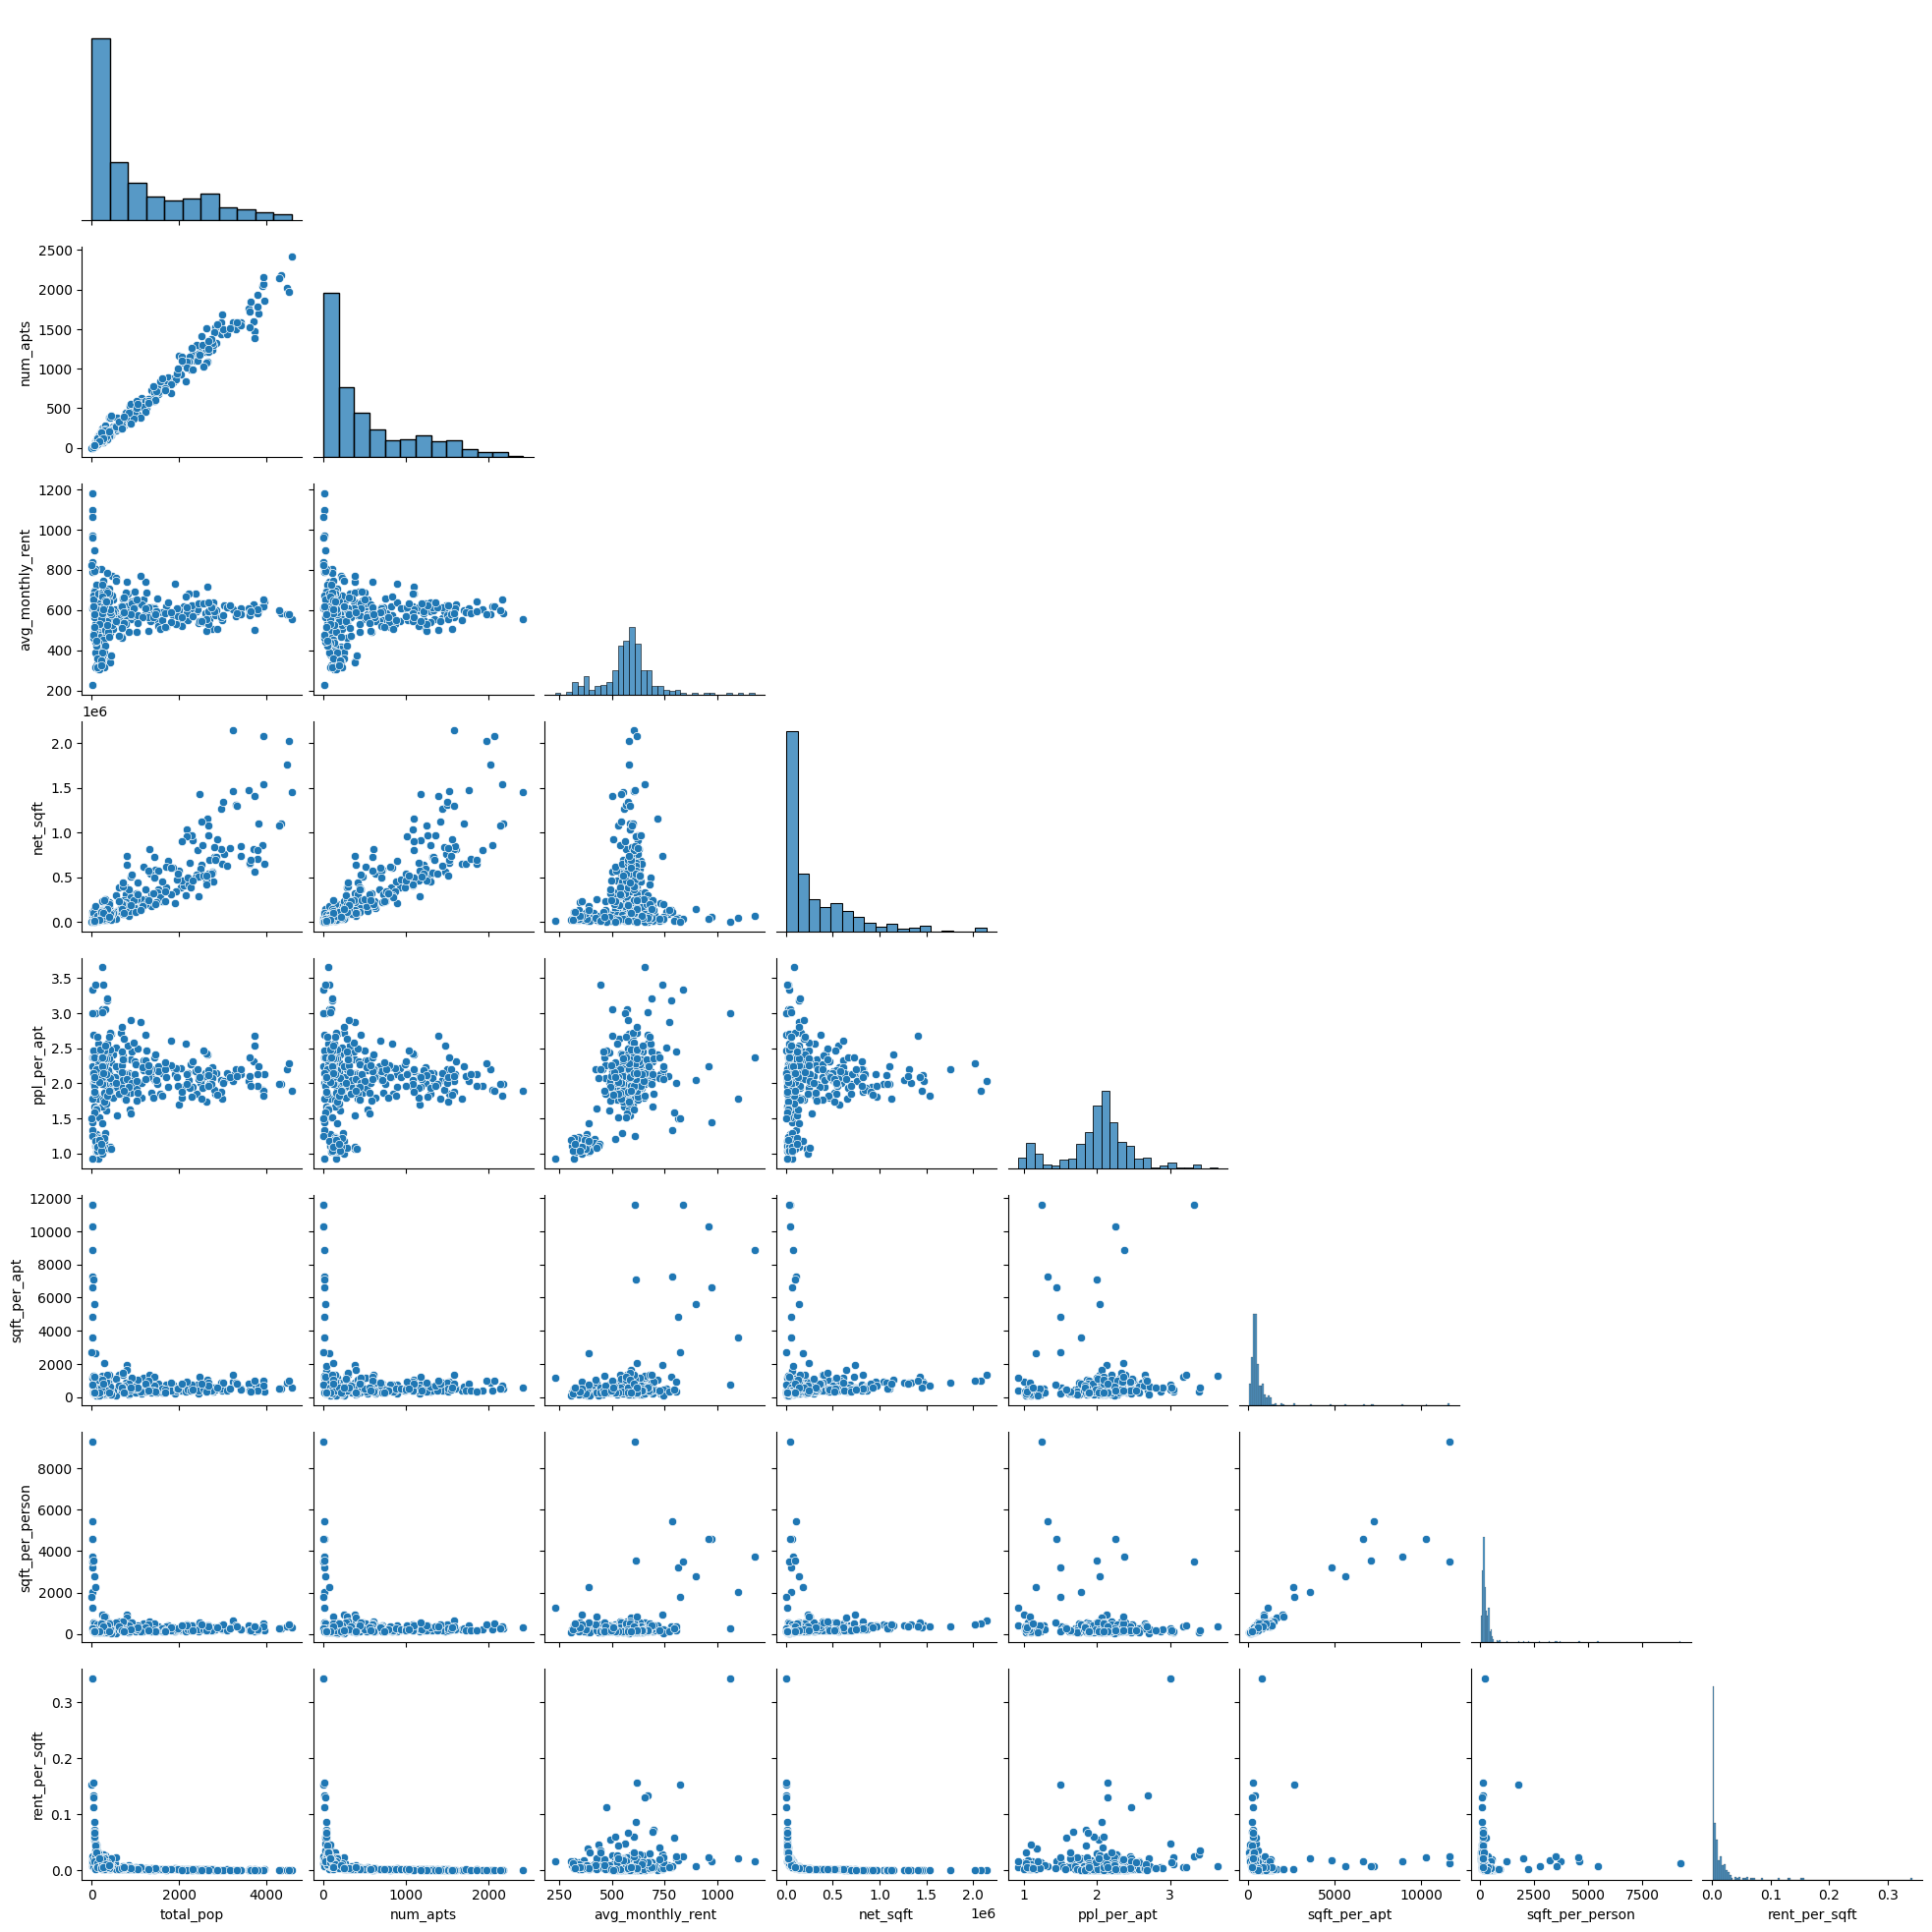

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ["total_pop", "num_apts", "avg_monthly_rent", "net_sqft", 
                   "ppl_per_apt", "sqft_per_apt", "sqft_per_person", "rent_per_sqft"]

#pairplot for numeric features
sns.pairplot(nycha_df[numeric_columns], diag_kind="hist", corner=True)

#displaying plot
plt.show()


In [146]:

#2.4 histogram conclusion #1: Average monthly rent has an even distribution for both the histogram and scatterplots
#2.4 histogram conclusion #2: The two top histograms are right skewed indicating that it is concentrated in the low numbers
#2.4 scatterplot conclusion #1: For the scatter plots, as the number of people increases, the sqft per person decreases which makes sense
#2.4 scatterplot conclusion #2: The scatterplots appear to have a lot of outliers for the sqft per person and I think this is because one apartment can have alot of people living there while another apartment can be a three bedroom with only one person

In [147]:

numeric_columns = ["total_pop", "num_apts", "avg_monthly_rent", "net_sqft", 
                   "ppl_per_apt", "sqft_per_apt", "sqft_per_person", "rent_per_sqft"]

#Pearson correlation coefficients
correlation_matrix = nycha_df[numeric_columns].corr()

print(correlation_matrix)


                  total_pop  num_apts  avg_monthly_rent  net_sqft  \
total_pop          1.000000  0.990145          0.098963  0.874212   
num_apts           0.990145  1.000000          0.059849  0.875494   
avg_monthly_rent   0.098963  0.059849          1.000000  0.084111   
net_sqft           0.874212  0.875494          0.084111  1.000000   
ppl_per_apt        0.153013  0.067491          0.542035  0.098735   
sqft_per_apt      -0.119545 -0.127140          0.413350 -0.006469   
sqft_per_person   -0.138336 -0.136768          0.300986 -0.030053   
rent_per_sqft     -0.324744 -0.328160          0.224180 -0.293691   

                  ppl_per_apt  sqft_per_apt  sqft_per_person  rent_per_sqft  
total_pop            0.153013     -0.119545        -0.138336      -0.324744  
num_apts             0.067491     -0.127140        -0.136768      -0.328160  
avg_monthly_rent     0.542035      0.413350         0.300986       0.224180  
net_sqft             0.098735     -0.006469        -0.030053      

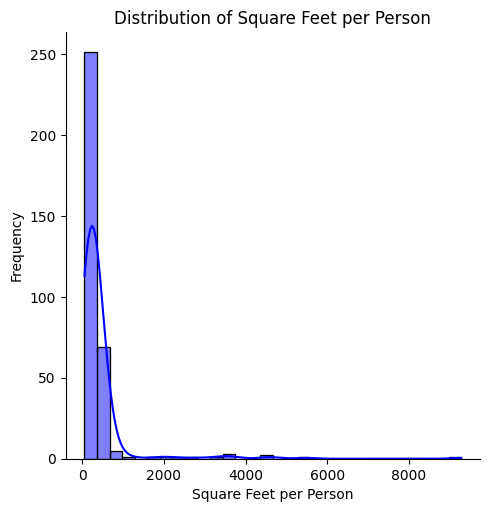

In [148]:
# Plot the histogram of sqft_per_person
sns.displot(nycha_df["sqft_per_person"], kde=True, color="blue", bins=30)

# Add labels and title
plt.title("Distribution of Square Feet per Person")
plt.xlabel("Square Feet per Person")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [149]:
#mean and median of sqft_per_person
cm_mean = nycha_df["sqft_per_person"].mean()
cm_median = nycha_df["sqft_per_person"].median()

print(f"  mean sqft per person: {cm_mean}")
print(f"median sqft per person: {cm_median}")


#3.1  #1: Square feet tends to fall under 1000 square feet per person.
#3.1  #2: There are some outliers and this can be happening because some people live in large apartments alone



#Task 3.4: this is likely happening because sqft per person is right skewed which means that some people have a small number of squart feet so they have a small apartment

  mean sqft per person: 398.3174515872763
median sqft per person: 224.20553359683794


In [150]:
import numpy as np

def mae_loss(y_pred, y_true):
    """
    Computes the Mean Absolute Error (MAE) between predicted and true values.

    :param y_pred: array-like, predicted values
    :param y_true: array-like, actual observed values
    :return: float, mean absolute error
    """
    return np.mean(np.abs(y_pred - y_true))


def rmse_loss(y_pred, y_true):
    """
    Computes the Root Mean Squared Error (RMSE) between predicted and true values.

    :param y_pred: array-like, predicted values
    :param y_true: array-like, actual observed values
    :return: float, root mean squared error
    """
    return np.sqrt(np.mean((y_pred - y_true) ** 2))


In [151]:

cm_mean = nycha_df["sqft_per_person"].mean()
cm_median = nycha_df["sqft_per_person"].median()

#loss values
cm_mean_mae = mae_loss(cm_mean, nycha_df["sqft_per_person"])
cm_mean_rmse = rmse_loss(cm_mean, nycha_df["sqft_per_person"])

cm_median_mae = mae_loss(cm_median, nycha_df["sqft_per_person"])
cm_median_rmse = rmse_loss(cm_median, nycha_df["sqft_per_person"])


print(f"cm_mean MAE: {cm_mean_mae}")
print(f"cm_mean RMSE: {cm_mean_rmse}")
print(f"cm_median MAE: {cm_median_mae}")
print(f"cm_median RMSE: {cm_median_rmse}")

cm_mean MAE: 292.8912232585764
cm_mean RMSE: 778.9306654274562
cm_median MAE: 233.52137433708887
cm_median RMSE: 798.1528309350089


In [152]:
import numpy as np
import pandas as pd

def compute_losses(y_true: pd.Series):
    """Compute MAE and RMSE losses over a range of theta values.

    :param y_true: pandas.Series with true data.
    :returns: pandas.DataFrame with MAE and RMSE values for each theta.
    """
    
    #theta values
    thetas = np.linspace(0, 1000, 1001)
    
    #store loss
    mae_loss = []
    rmse_loss = []

    #compute MAE & RMSE
    for theta in thetas:
        mae = np.mean(np.abs(y_true - theta)) 
        rmse = np.sqrt(np.mean((y_true - theta) ** 2))  
        
        mae_loss.append(mae)
        rmse_loss.append(rmse)

    
    df_loss = pd.DataFrame({
        "theta": thetas,
        "mae": mae_loss,
        "rmse": rmse_loss
    })

    return df_loss




In [153]:
#calling the function
df_loss = compute_losses(nycha_df['sqft_per_person'])

print(df_loss.head())


   theta         mae        rmse
0    0.0  398.317452  874.865575
1    1.0  397.317452  874.410738
2    2.0  396.317452  873.956809
3    3.0  395.317452  873.503789
4    4.0  394.317452  873.051679


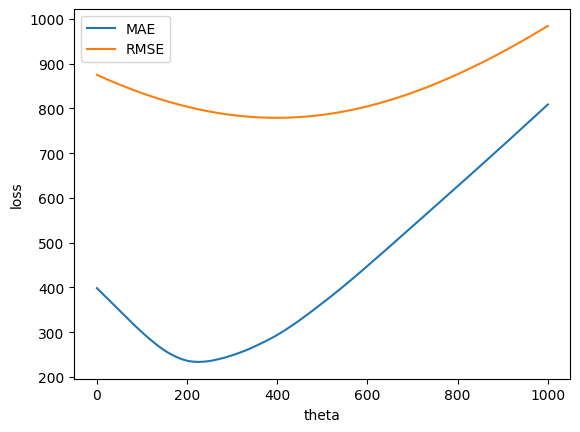

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

#MAE
sns.lineplot(x=df_loss['theta'], y=df_loss['mae'], label="MAE")

#RMSE
sns.lineplot(x=df_loss['theta'], y=df_loss['rmse'], label="RMSE")

#y-axis label
plt.ylabel("loss")
plt.legend()
plt.show()


In [155]:
#MAE
min_mae_row = df_loss.loc[df_loss['mae'].idxmin()]

print(min_mae_row)

theta    224.000000
mae      233.521374
rmse     798.197692
Name: 224, dtype: float64


In [156]:
#RMSE
min_rmse_row = df_loss.loc[df_loss['rmse'].idxmin()]

print(min_rmse_row)

theta    398.000000
mae      292.705789
rmse     778.930730
Name: 398, dtype: float64


In [157]:
#3.12 The MAE model will be most like the median while the RMSE model will be most like the mean

#3.13 Since there are some outliers in the data, the MAE model will be best as it will make sure the model performs the best despite the outliers